<a href="https://colab.research.google.com/github/devanoabe/PCVK_GANJIL_23-24/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection**

Metode yang digunakan:


1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection



In [ ]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Template Matching**

Menggunakan library openCV:

**cv.matchTemplate()**, dengan parameter:


*   **image**: citra input
*   **templ**: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
*   **method**: metode dari template matching

Jenis metode template matching di OpenCV:
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

Dokumentasi lengkap bisa dilihat di:
1. https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html

2. https://docs.opencv.org/3.4/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be


In [1]:
#load citra input
img = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/cat2_templatejpg.jpg',0)
#dimensi citra
w, h = template.shape[::-1]

#print input image dan template
f, axarr = plt.subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

#membuat array untuk menampung 6 jenis metode template matching yang disediakan openCV
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

#perulangan untuk setiap elemen yang ada di array methods
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    #memanggil metode template matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, (0, 0, 255), 3)
    plt.figure(figsize = (15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)

    plt.show()

NameError: ignored

**Template Matching dengan Multiple Object**

In [ ]:
#load citra input
img = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/bahrain.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#load citra template
template = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/bahrain-template.jpg',0)
#dimensi citra
w, h = template.shape[::-1]

f, axarr = plt.subplots(1,2,figsize=(15,35)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)

threshold = 0.45
loc = np.where( res >= threshold)

#membuat 2 list untuk menampung koordinat x,y dan variable count untuk menampung jumlah objek
lspoint=[]
lspoint2=[]
count = 0

for pt in zip(*loc[::-1]):
	#cek apakah koordinat sudah terdapat pada list, jika sudah.. skip
	if pt[0] not in lspoint and pt[1] not in lspoint2:
		##menggambar kotak batas
		cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
		for i in range(((pt[0])-9), ((pt[0])+9),1):
			#masukkan koordinat x
			lspoint.append(i)
		for k in range(((pt[1])-9), ((pt[1])+9),1):
			#masukkan koordinat y
			lspoint2.append(k)
		count+=1
	else:
		continue
print ("total objects found ", count)

plt.figure(figsize=(10,45))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# **Edge Detection**

Metode Edge Detection yang disediakan oleh OpenCV:
1. **Sobel Edge Detection**
    
    dokumentasi: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html

2. **Canny Edge Detection**
    
    dokumentasi: https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html

3. **Laplacian Edge Detection**

    dokumentasi: https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html



**1. Sobel Edge Detection**

parameter:
* src: input image
* ddepth: kedalaman citra output
* ksize: ukuran kernel



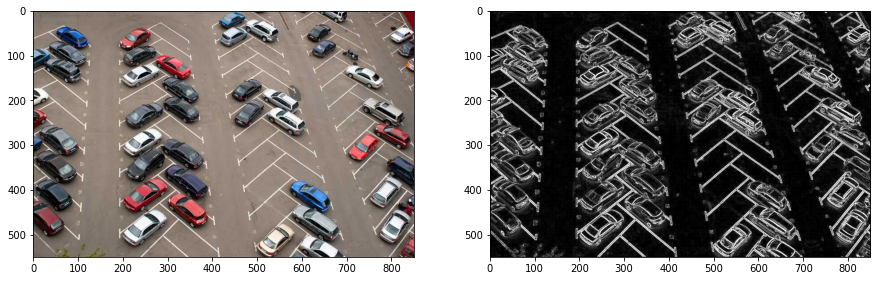

In [ ]:
#load citra input
input_img = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/parking-lot-cars.jpg')
gray_img = cv.cvtColor(input_img,cv.COLOR_BGR2GRAY)

grad_x = cv.Sobel(gray_img, cv.CV_64F, 1, 0, ksize=3)
grad_y = cv.Sobel(gray_img, cv.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)


grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

f, axarr = plt.subplots(1,2,figsize = (15,5)) #membuat 2 plot untuk citra input dan output
axarr[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
axarr[1].imshow(grad, cmap='gray')

**2. Canny Edge Detection**

parameter:
*   src: input image
*   thres1: threshold 1
*   thres2: threshold 2



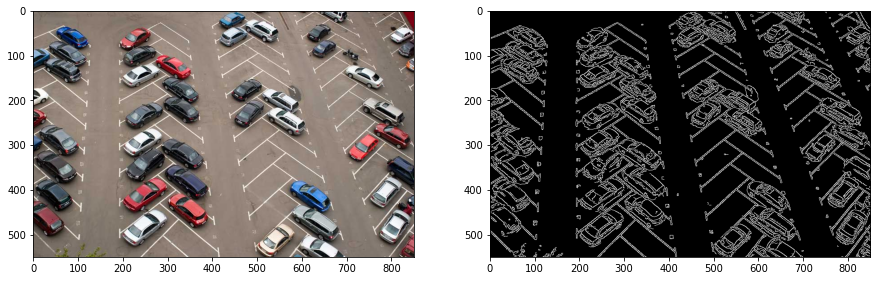

In [ ]:
output_canny = cv.Canny(gray_img, 100, 200)

f, axarr = plt.subplots(1,2,figsize = (15,5)) #membuat 2 plot untuk citra input dan output
axarr[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
axarr[1].imshow(output_canny, cmap='gray')

**3. Laplacian**

parameter:
* src: input image
* ddepth: kedalaman citra output
* ksize: kernel size



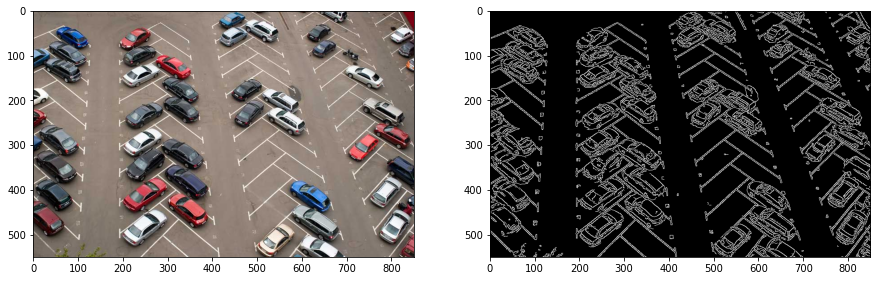

In [ ]:
output_laplacian = cv.Laplacian(gray_img, cv.CV_64F, 3)

f, axarr = plt.subplots(1,2,figsize = (15,5)) #membuat 2 plot untuk citra input dan output
axarr[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
axarr[1].imshow(output_canny, cmap='gray')

# **Corner Detection**

Metode corner detection yang disediakan oleh OpenCV:
1. Harris Corner Detection
    
    dokumentasi: https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html
2. Shi-Tomasi Corner Detection
    
    dokumentasi: https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html

**1. Harris Corner Detection**

parameter:
* src: citra input
* blocksize: ukuran ketetanggaan
* ksize: Aperture parameter dari Sobel
* k: parameter bebas untuk Harris detector



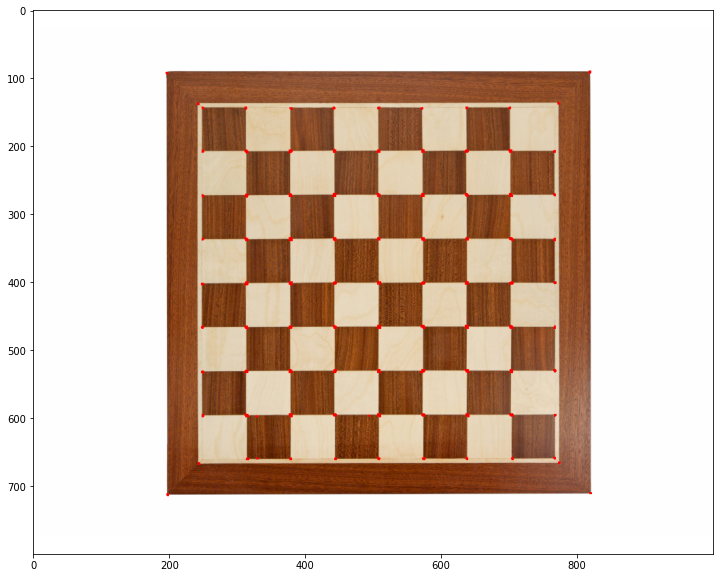

In [ ]:
#load citra input
input_img = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/chess-board.jpg')
gray_img = cv.cvtColor(input_img,cv.COLOR_BGR2GRAY)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3,0.04)

#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output,None)

#Threshold untuk mengoptimalkan nilai
input_img[harris_output>0.01*harris_output.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))


**2. Shi-Tomasi Corner Detection**

parameter:


* src: input image
* maxCorners: jumlah maksimum titik sudut
* qualityLevel: minimal kualitas dari titik sudut
* minDistance: jarak Euclidean minimum yang mungkin antara sudut



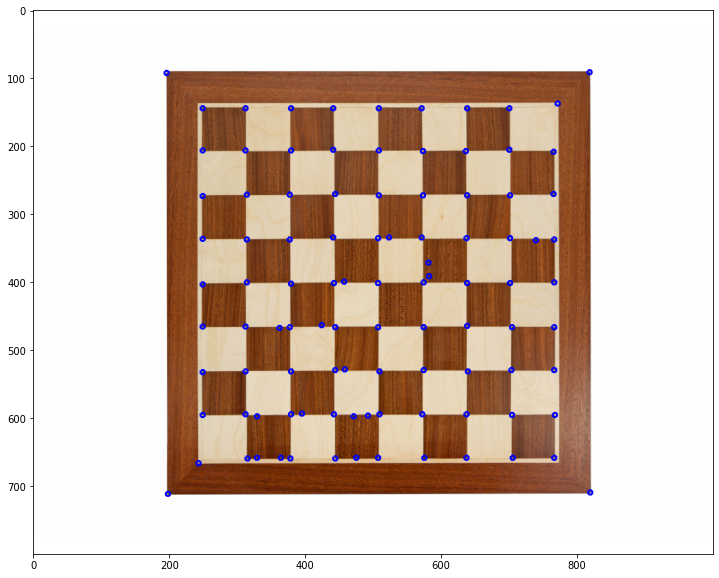

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/chess-board.jpg')
gray_img = cv.cvtColor(input_img,cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img,100,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img,(x,y),3,255,2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

# **Grid Detection**

Metode yang akan digunakan untuk Grid Detection adalah **Hough transform**,

dokumentasi: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

**Tahapan**:
1. Menerapkan Canny Edge Detection
2. Dilasi gambar tepi (Canny bisa menemukan kedua tepi pemisah pada grid sebagai tepi yang berbeda, dilatasi dapat membuat kedua tepi ini bergabung lagi)
3. Erosi (setelah proses dilasi, garis border menjadi tebal sehingga Hough akan mendeteksi banyak garis)
4. Menerapkan HoughLines
5. Menggabungkan garis yang mirip (similar)

number of Hough lines: 33
Number of filtered lines: 20


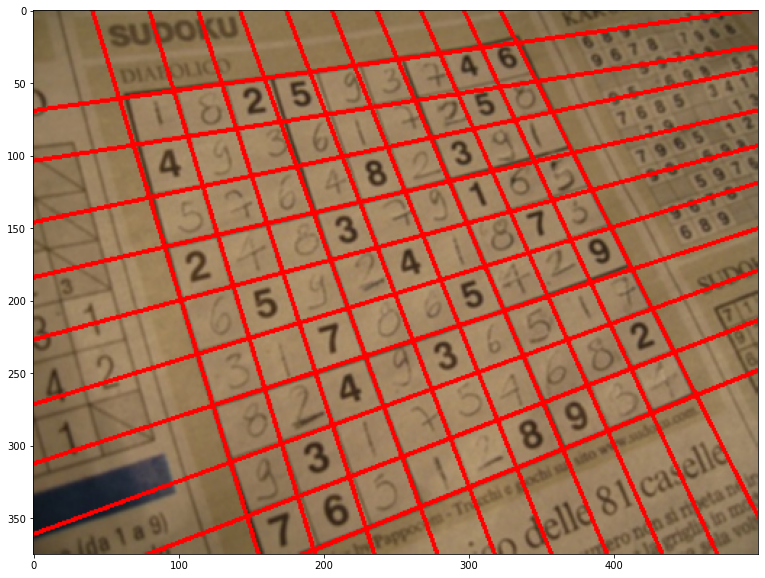

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/sudoku.jpg')
img_gray = cv.cvtColor(input_img,cv.COLOR_BGR2GRAY)

edges = cv.Canny(img_gray,90,150,apertureSize = 3)

kernel = np.ones((3,3),np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5),np.uint8)
edges = cv.erode(edges,kernel,iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)

if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1

    # berapa banyak baris yang mirip dengan yang diberikan
    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(len(lines)):
            if i == j:
                continue

            rho_i,theta_i = lines[i][0]
            rho_j,theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    # mengurutkan indeks garis dengan melihat seberapa banyak yang mirip dengannya
    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x : len(similar_lines[x]))

    # line flags sebagai dasar filtering
    line_flags = len(lines)*[True]
    for i in range(len(lines) - 1):
        if not line_flags[indices[i]]: #jika elemen ke-i tidak dimasukkan, maka akan diabaikan
            continue

        for j in range(i + 1, len(lines)): # hanya mempertimbangkan elemen-elemen yang memiliki garis yang kurang mirip
            if not line_flags[indices[j]]:
                continue

            rho_i,theta_i = lines[indices[i]][0]
            rho_j,theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags[indices[j]] = False

print('number of Hough lines:', len(lines))

filtered_lines = []

if filter:
    for i in range(len(lines)): # filtering
        if line_flags[i]:
            filtered_lines.append(lines[i])

    print('Number of filtered lines:', len(filtered_lines))
else:
    filtered_lines = lines

for line in filtered_lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(input_img,(x1,y1),(x2,y2),(0,0,255),2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

# **Contour Detection**

dokumentasi:
https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html

parameter:
* src: citra input
* mode: mode pengambilan kontur

    (jenis: https://docs.opencv.org/4.4.0/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71)
* method: metode perkiraan kontur

    (jenis: https://docs.opencv.org/4.4.0/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff)

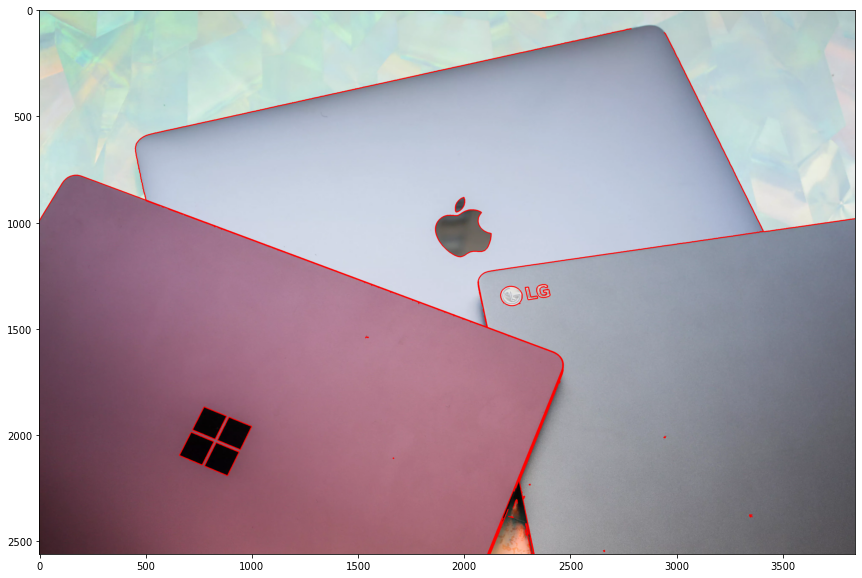

In [ ]:
#load citra input
img = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/laptop.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

#ret, thresh = cv.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)


cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))